In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import font_manager 
from matplotlib.lines import Line2D

### パラメータ設定

In [2]:
# WACCの計算
def calc_wacc(cost_of_equity, cost_of_debt, tax_rate,
         market_capitalization, debt):
    asset = market_capitalization + debt
    required_rate_of_return = (
        cost_of_equity * (market_capitalization / asset) + 
        cost_of_debt * (debt / asset) * (1 - tax_rate)
    )
    return required_rate_of_return

# シミュレーション関数(初期値は入力済み)
def monte_carlo_dcf_simulation(num_scenarios = 10000, prediction_period = 5, 
                               cost_of_equity = 0.2, cost_of_debt = 0.03, tax_rate = 0.3,
                               market_capitalization = 20e6, debt = 30e6, initial_FCFE = 10e6,
                               growth_rate = 0.1, std_growth_rate = 0.1, terminal_growth_rata = 0.01):
    # 割引率
    required_rate_of_return = calc_wacc(cost_of_equity, cost_of_debt, 
                                        tax_rate, market_capitalization, debt)
    
    future_FCFE_li_2d =[]
    present_FCFE_li_2d = []
    present_terminal_value_li = []
    present_value_li = []
    for _ in range(num_scenarios):

        # 予測期間のキャッシュフロー
        future_FCFE = initial_FCFE
        future_FCFE_li =[]
        for i in range(prediction_period):
            future_FCFE = future_FCFE * (1 + np.random.normal(growth_rate, growth_rate * std_growth_rate))
            future_FCFE_li.append(future_FCFE)

        # キャッシュフローの現在価値
        present_FCFE_li = []
        for i, fcfe in enumerate(future_FCFE_li):
            present_fcfe = fcfe/ ((1 + required_rate_of_return)**(i+1))
            present_FCFE_li.append(present_fcfe)

        # ターミナルバリューの現在価値
        terminal_value = future_FCFE_li[prediction_period - 1] / (required_rate_of_return - terminal_growth_rata)
        present_terminal_value = terminal_value / ( 1 + required_rate_of_return )**(prediction_period)

        # 現在価値
        present_value = sum(present_FCFE_li) + present_terminal_value
        
        future_FCFE_li_2d.append(future_FCFE_li)
        present_FCFE_li_2d.append(present_FCFE_li)
        present_terminal_value_li.append(present_terminal_value)
        present_value_li.append(present_value)


    pres_value_median = np.median(present_value_li)
    pres_value_2_5_per = np.percentile(present_value_li, 2.5)
    pres_value_5_per = np.percentile(present_value_li, 97.5)
    pres_value_95_per = np.percentile(present_value_li, 2.5)
    pres_value_97_5_per = np.percentile(present_value_li, 97.5)

    result = {
        "future_FCFE_li_2d":future_FCFE_li_2d,
        "present_value_li": present_value_li,
        "present_FCFE_li_2d":present_FCFE_li_2d,
        "present_terminal_value_li":present_terminal_value_li, 
        "wacc": required_rate_of_return,
        "pres_value_median": pres_value_median,
        "pres_value_2_5_per": pres_value_2_5_per,
        "pres_value_5_per": pres_value_5_per,
        "pres_value_95_per": pres_value_95_per,
        "pres_value_97_5_per": pres_value_97_5_per
    }
    
    return result

In [9]:
# 生成するシナリオの数
num_scenarios = 1000

# キャッシュフロー予測期間（年）
prediction_period = 5

# WACC( = 割引率、要求収益率)の計算
cost_of_equity = 0.2 # 株主資本コスト
cost_of_debt = 0.03 # 負債コスト
tax_rate = 0.3 # 実効税率
market_capitalization = 20e6 # 株式時価総額
debt = 30e6 # 有利子負債
asset = market_capitalization + debt
# required_rate_of_return = (
#     cost_of_equity * (market_capitalization / asset) + 
#     cost_of_debt * (debt / asset) * (1 - tax_rate)
# )

# 開始FCFE
initial_FCFE = 10e6

# 成長率
growth_rate = 0.1
# 成長率の変動
std_growth_rate = 0.1

# 永久成長率
terminal_growth_rata = 0.01

calc_result = monte_carlo_dcf_simulation(num_scenarios, prediction_period, 
                            cost_of_equity, cost_of_debt, tax_rate,
                            market_capitalization, debt, initial_FCFE,
                            growth_rate, std_growth_rate, terminal_growth_rata)

In [10]:
# 結果取得
present_value_li = calc_result["present_value_li"]
wacc = round(calc_result["wacc"] * 100, 1)
pres_value_median = round(calc_result["pres_value_median"])
formatted_pres_value_median = f"{pres_value_median:,}"
pres_value_2_5_per = round(calc_result["pres_value_2_5_per"])
pres_value_97_5_per = round(calc_result["pres_value_97_5_per"])
formatted_pres_value_2_5_per = f"{pres_value_2_5_per:,}"
formatted_pres_value_97_5_per = f"{pres_value_97_5_per:,}"

print(present_value_li)
print(wacc)
print(formatted_pres_value_median)
print(formatted_pres_value_2_5_per)
print(formatted_pres_value_97_5_per)

[176823285.08234352, 176047048.42679596, 172618460.48881358, 169706818.38270923, 176880612.43783864, 175805391.76393375, 171118572.47391212, 179009656.01522753, 173501455.2285052, 174497115.6929871, 178207256.62275425, 175043794.81870243, 177374962.5094351, 174665452.51834738, 177301928.8815975, 177035966.42278612, 180110127.25013497, 175746020.01735568, 178911141.53603497, 173360415.6643119, 170177791.56837368, 172540649.08497763, 177394851.99683464, 175173872.80230007, 177829866.10019433, 175302798.060569, 177714974.23759532, 176689034.3605138, 177705573.296397, 178433215.72465295, 171311548.0483666, 173048299.74260372, 178992143.8355, 172292561.80927226, 180680317.40845656, 178693752.74575025, 178275545.28674614, 178727803.98115477, 169704487.26463768, 182484609.942707, 178642307.00941157, 173789544.87060753, 180063550.00255024, 173323635.2046792, 176785770.95965603, 176098288.50778118, 173539057.81958508, 178083412.8333559, 180510316.6892171, 179168119.36237583, 177660693.96649665,

Text(0, 0.5, 'Frequency')

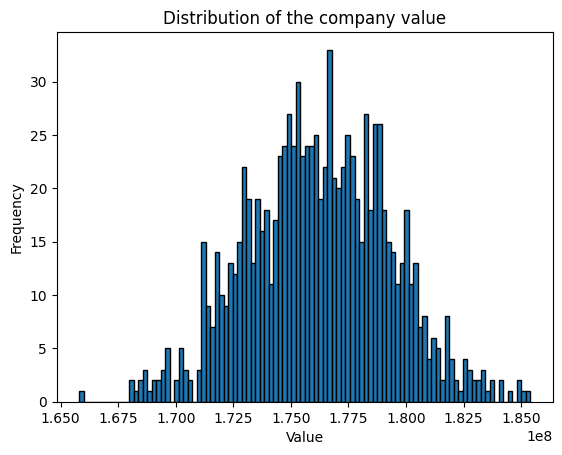

In [11]:
# ヒストグラム可視化
present_values = np.array(present_value_li)
fig, ax = plt.subplots()
ax.hist(present_values, bins=100, edgecolor='black')
ax.set_title('Distribution of the company value')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'value')

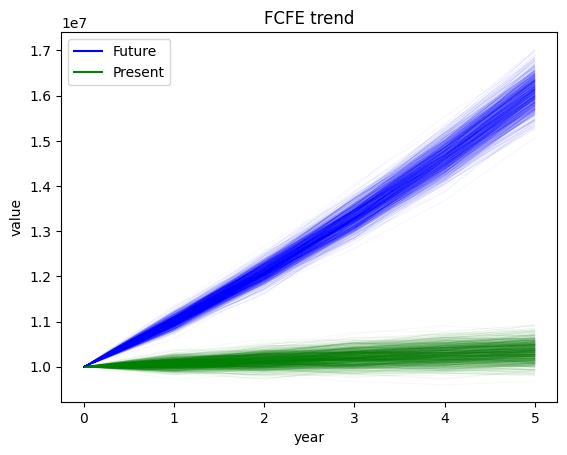

In [12]:
present_FCFE_array = np.array(calc_result["present_FCFE_li_2d"])
future_FCFE_array = np.array(calc_result["future_FCFE_li_2d"])
present_FCFE_array.shape

# # 各行をプロット
# for row in present_FCFE_array[:5, :]:
#     line_data = np.insert(row, 0, 10000000)  # 始点を10000000に設定
#     print(row)
#     print(line_data)


# グラフを作成
fig, ax = plt.subplots()

# 将来キャッシュフローの推移
for row in future_FCFE_array:
    line_data = np.insert(row, 0, initial_FCFE)  # 始点を10000000に設定
    ax.plot(line_data, color="blue", linewidth=0.5, alpha=0.05)

# 将来キャッシュフローを現在価値に直した場合の推移
for row in present_FCFE_array:
    line_data = np.insert(row, 0, initial_FCFE)  # 始点を10000000に設定
    ax.plot(line_data, color="green", linewidth=0.5, alpha=0.05)

# 凡例を追加
legend_elements = [Line2D([0], [0], color='blue', label='Future'),
                   Line2D([0], [0], color='green', label='Present')]
ax.legend(handles=legend_elements, loc='upper left')

ax.set_title('FCFE trend')
ax.set_xlabel('year')
ax.set_ylabel('value')

In [8]:
present_FCFE_array.shape

(10000, 5)